# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [165]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [91]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\siddh\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


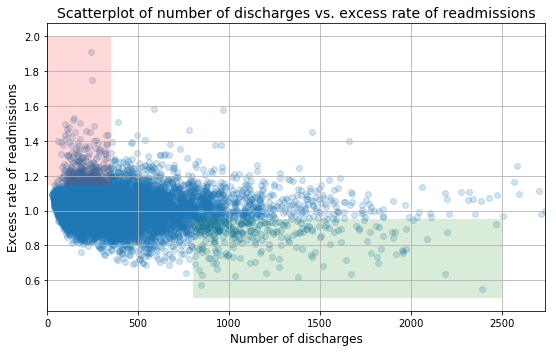

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****


### A. Do you agree with the above analysis and recommendations? Why or why not? 

No, I do not agree with the analysis and therefore the recommendations. 
Specifically the following two bullet points sound spurious
* With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
* With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

The reason is that area shaded red selectively excludes an important part of data of "lower number of discharges" i.e. the area below y = 1.15. Similarly, the green area excludes a large number of hospitals with "higher number of discharges" i.e area above y = 0.5. 

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:


#### Approach 
* Divide the data into 5 groups of  hospitals based on number of discharges. 
* Measure the mean access rates of admissions in each group along with the standard error. 
* See if there is a trend
* Validate the visual inference by a statistical test 



In [92]:
df = clean_hospital_read_df
summary = df.iloc[:,[2,4, 6]].groupby(pd.cut(df['Number of Discharges'], [-1,150, 300, 600, 1200, 2600])).agg(['mean','size','std'])
summary

Number of Discharges                    \
                                     mean  size         std   
Number of Discharges                                          
(-1, 150]                       98.920869  2717   33.678830   
(150, 300]                     221.334382  3496   43.222623   
(300, 600]                     425.150880  3579   84.937340   
(600, 1200]                    800.215545  1531  157.832493   
(1200, 2600]                  1566.116466   249  318.628738   

                     Excess Readmission Ratio                  
                                         mean  size       std  
Number of Discharges                                           
(-1, 150]                            1.016291  2717  0.070933  
(150, 300]                           1.012729  3496  0.090107  
(300, 600]                           1.002849  3579  0.096650  
(600, 1200]                          0.997206  1531  0.105594  
(1200, 2600]                         0.972751   249  0.128899

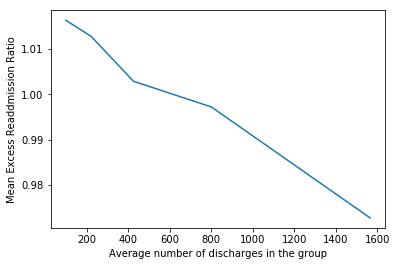

In [93]:
#Plot the average number of excess readmission ratio in each group
plt.plot(summary.iloc[:,[0]],summary.iloc[:,[3]])
plt.xlabel('Average number of discharges in the group')
plt.ylabel('Mean Excess Readdmission Ratio')

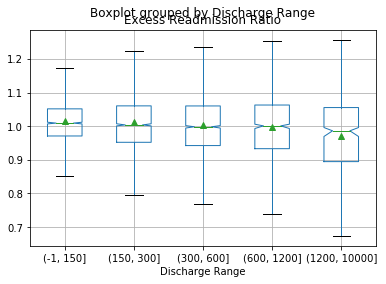

In [111]:
#The above looks suspicious because variation on y-axis looks small, lets plot a boxplot
df['Discharge Range'] = pd.cut(df['Number of Discharges'], [-1,150, 300, 600, 1200, 10000])
df.boxplot(column='Excess Readmission Ratio',by = 'Discharge Range', showfliers = False, 
           showmeans=True, notch=True,bootstrap = 1000)

The boxplot above shows that, the relationship between Discharge range and excess readmission ratio is very weak. The whiskers of each box are fairly wide implying that whether the hospital is large or small, its readmission rate can widely differ. 

### Hypothesis testing

H0 = Hospitals with less than 100 discharges, have the statistically the same average excess readmission ratio as the hospitals with more than 1000 discharges. 
H1 = Null hypothesis is false

In [135]:
df_small = df[(df['Number of Discharges'] < 100) & ~df['Excess Readmission Ratio'].isnull()]
df_large = df[(df['Number of Discharges'] > 1000) & ~df['Excess Readmission Ratio'].isnull()]


In [137]:
len(df_small), len(df_large)

(1188, 463)

In [138]:
df_small['Excess Readmission Ratio'].mean()

1.0226183501683506

In [139]:
df_large['Excess Readmission Ratio'].mean()

0.9783354211663071

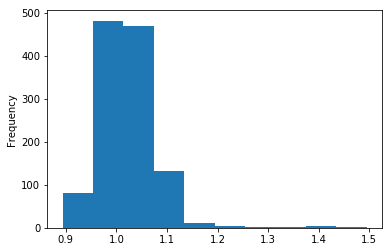

In [149]:
df_small['Excess Readmission Ratio'].plot(kind='hist')
#Distribution does not look normal. Fat tail on right end

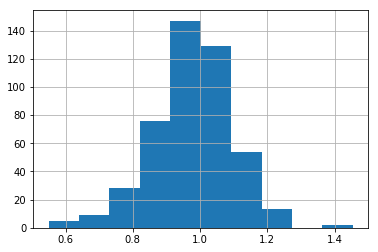

In [146]:
df_large['Excess Readmission Ratio'].hist()
#Distribution does not look normal. Assymetric on both sides. 

Since the distribution of both the small and large 'excess readmission rates' look different from each other and also don't 
like normal, therefore let us do hypothesis testing using resampling from emperical distribution.

In [195]:
## the below code is copied from Allen Downy's Random Sampling tutorial

class Resampler(object):
    """Represents a framework for computing sampling distributions."""
    
    def __init__(self, sample, xlim=None):
        """Stores the actual sample."""
        self.sample = sample
        self.n = len(sample)
        self.xlim = xlim
        
    def resample(self):
        """Generates a new sample by choosing from the original
        sample with replacement.
        """
        new_sample = np.random.choice(self.sample, self.n, replace=True)
        return new_sample
    
    def sample_stat(self, sample):
        """Computes a sample statistic using the original sample or a
        simulated sample.
        """
        return sample.mean()
    
    def compute_sampling_distribution(self, iters=1000):
        """Simulates many experiments and collects the resulting sample
        statistics.
        """
        stats = [self.sample_stat(self.resample()) for i in range(iters)]
        return np.array(stats)
    
    def plot_sampling_distribution(self, alpha = 0.1):
        """Plots the sampling distribution."""
        sample_stats = self.compute_sampling_distribution()
        se = sample_stats.std()
        ci = np.percentile(sample_stats, [100*alpha/2, 100*(1 - alpha/2)])
    
        plt.hist(sample_stats, color=COLOR2)
        plt.xlabel('sample statistic')
        plt.xlim(self.xlim)
        ax = plt.subplot()
#        ax.text(0.03, 0.95, 'CI [%0.2f %0.2f]' % tuple(ci))
#        ax.text(0.03, 0.85, 'SE %0.2f' % se)
        plt.show()
        return se, ci

# some nicer colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'
        

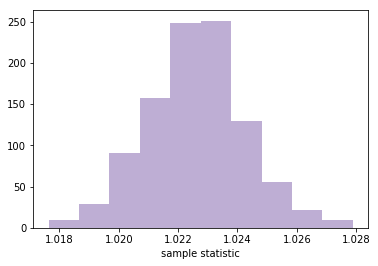

array([ 1.01826227,  1.02700098])

In [196]:
#Plot the sampling distribution of sample mean of Excess Readmission Ratio for small hospitals
sml = Resampler(df_small['Excess Readmission Ratio'])
[se_small, ci_small] = sml.plot_sampling_distribution(alpha = 0.01)
ci_small

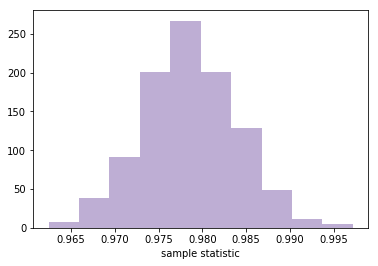

array([ 0.96528247,  0.99349659])

In [197]:
#Plot the sampling distribution of sample mean of Excess Readmission Ratio for large hospitals

lrg = Resampler(df_large['Excess Readmission Ratio'])
[se_large, ci_large] = lrg.plot_sampling_distribution(alpha=0.01)
ci_large

#### Hypothesis Test Result
At the confidence level of $\alpha$ = 0.01
* Confidence Intervals of Mean Excess Readmission Ratio for Small hospitals is [1.018, 1.027] 
* Confidence Intervals of Mean Excess Readmission Ratio for Large hospitals is [0.965, 0.993] 

#### Conclusion
Therfore we are more than 99% certain that Small hospitals have larger excess readmission ratios than the large

### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Though the results are statistically significant, in terms of practical signficance, we are only able to change the readmission rates by 1 or 2% based on size factor. That may not be the most important factor deciding the re-admission rate. So we should study other factors.